In [1]:
charles = open("data/charles.txt").read()
print(charles[:100])

CHARLESMILLESMANSONNMADDOXNOVEMBERNOVEMBERWASANAMERICANCRIMINALANDCULTLEADERINTHELATESHEFORMEDWHATBE


In [2]:
alphabet = "".join([chr(ord('A') + i%26) for i in range(500)])
print(alphabet[:100])

ABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUV


In [3]:
testparams = {"text":alphabet, "width":20, "height":6}

In [4]:
class CodeBlock(list):
    def __repr__(self):
        return "\n".join(self)

In [5]:
def makeblock(text, width, height):
    block = []
    assert(width * height <= len(text))
    for r in range(height):
        start = r * width
        stop = start + width
        block.append(text[start:stop])
    return CodeBlock(block)

In [6]:
makeblock(**testparams)

ABCDEFGHIJKLMNOPQRST
UVWXYZABCDEFGHIJKLMN
OPQRSTUVWXYZABCDEFGH
IJKLMNOPQRSTUVWXYZAB
CDEFGHIJKLMNOPQRSTUV
WXYZABCDEFGHIJKLMNOP

In [7]:
def makereverse(text, width, height):
    return CodeBlock([line[::-1] for line in makeblock(text, width, height)])

In [8]:
makereverse(**testparams)

TSRQPONMLKJIHGFEDCBA
NMLKJIHGFEDCBAZYXWVU
HGFEDCBAZYXWVUTSRQPO
BAZYXWVUTSRQPONMLKJI
VUTSRQPONMLKJIHGFEDC
PONMLKJIHGFEDCBAZYXW

In [9]:
def makezigzag(text, width, height):
    block = []
    for r, line in enumerate(makeblock(text, width, height)):
        block.append(line if (r%2 == 0) else line[::-1])
    return CodeBlock(block)

In [10]:
makezigzag(**testparams)

ABCDEFGHIJKLMNOPQRST
NMLKJIHGFEDCBAZYXWVU
OPQRSTUVWXYZABCDEFGH
BAZYXWVUTSRQPONMLKJI
CDEFGHIJKLMNOPQRSTUV
PONMLKJIHGFEDCBAZYXW

In [11]:
def makespiral(text, width, height):
    assert(width * height <= len(text))
    block = [[" "] * width for i in range(height)]
    nhoriz,nvert = width, height
    iterText = iter(text)
    direction = 0 # 0,1,2,3 = right, down, left, up
    c,r = -1,0    # start one step outside of the block
    while nhoriz > 0 and nvert > 0:
        if direction == 0:
            for n in range(nhoriz):
                c += 1
                block[r][c] = iterText.__next__()
            nvert -= 1
        elif direction == 1:
            for n in range(nvert):
                r += 1
                block[r][c] = iterText.__next__()
            nhoriz -= 1
        elif direction == 2:
            for n in range(nhoriz):
                c -= 1
                block[r][c] = iterText.__next__()
            nvert -= 1
        else:
            for n in range(nvert):
                r -= 1
                block[r][c] = iterText.__next__()
            nhoriz -= 1
        direction = (direction + 1) % 4
    block = ["".join(row) for row in block]
    return CodeBlock(block)

In [12]:
makespiral(**testparams)

ABCDEFGHIJKLMNOPQRST
VWXYZABCDEFGHIJKLMNU
UJKLMNOPQRSTUVWXYZOV
TIPONMLKJIHGFEDCBAPW
SHGFEDCBAZYXWVUTSRQX
RQPONMLKJIHGFEDCBAZY

In [13]:
from PIL import Image

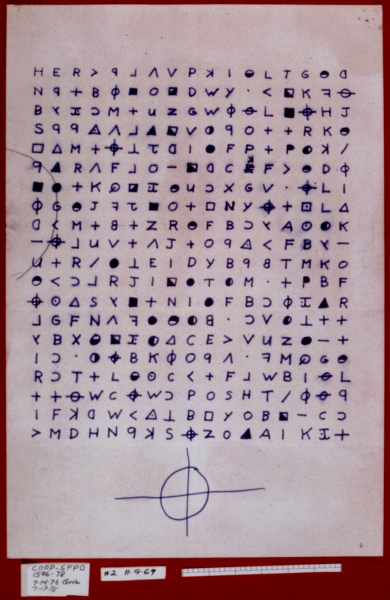

In [14]:
z340_raw = Image.open("images/390px-340-cipher-hi-resolution.jpg")
z340_raw

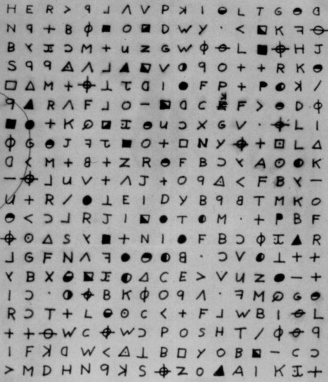

In [15]:
x,y = 27,63
width,height = 328, 382
box = (x, y, x + width, y + height)
z340_cropped = z340_raw.crop(box).convert("L")
z340_cropped

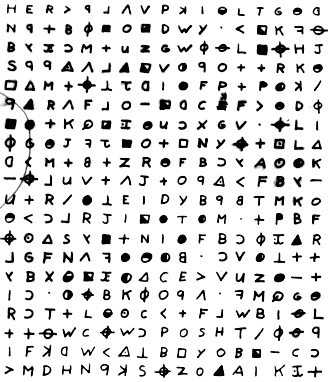

In [16]:
from PIL import ImageEnhance
brightness = ImageEnhance.Brightness(z340_cropped)
tmp = brightness.enhance(1.6)
contrast = ImageEnhance.Contrast(tmp)
z340_enhanced = contrast.enhance(2)
z340_enhanced

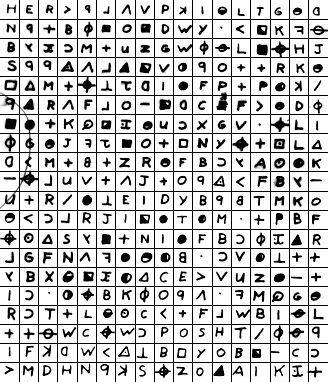

In [17]:
from PIL import ImageDraw

def testRaster(cols, rows, im):
    raster = im.copy()
    draw = ImageDraw.Draw(raster)
    dx = im.width / cols
    dy = im.height / rows
    for c in range(1, cols):
        draw.line((c * dx, 0, c * dx, im.height))
    for r in range(1, rows):
        draw.line((0, r * dy, im.width, r * dy))
    return raster

testRaster(17,20,z340_enhanced)

In [18]:
def z340_getSymbol(col, row):
    im = z340_enhanced
    dx = im.width / 17
    dy = im.height / 20
    box = (col * dx, row * dy, (col+1) * dx, (row+1) * dy)
    return im.crop(box)

z340_getSymbol(1,1)